# VoxCeleb1 --- Stats

|                    | Dev     | Test   | All      |
| ---                | ---     | ---    | ---      |
| Number of samples  | 148,642 |  4,874 |  153,516 |
| Number of speakers |   1,211 |     40 |    1,251 |

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
os.chdir('../..')
sys.path.insert(1, os.path.join(sys.path[0], '../..'))

In [2]:
from glob import glob
from tqdm import tqdm
import soundfile as sf

from plotnine import *
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0


In [5]:
DATASET_NAME = 'VoxCeleb1'
DATASET_PATH = 'data/voxceleb1'

In [6]:
files = glob(f'{DATASET_PATH}/**/**/*.wav')
speakers = glob(f'{DATASET_PATH}/*')

print(f'Number of samples: {len(files)}')
print(f'Number of speakers: {len(speakers)}')

Number of samples: 153516
Number of speakers: 1251


## Length distribution

100%|███████████████████████████████████████████████████████████████████████████| 153516/153516 [00:19<00:00, 8052.79it/s]


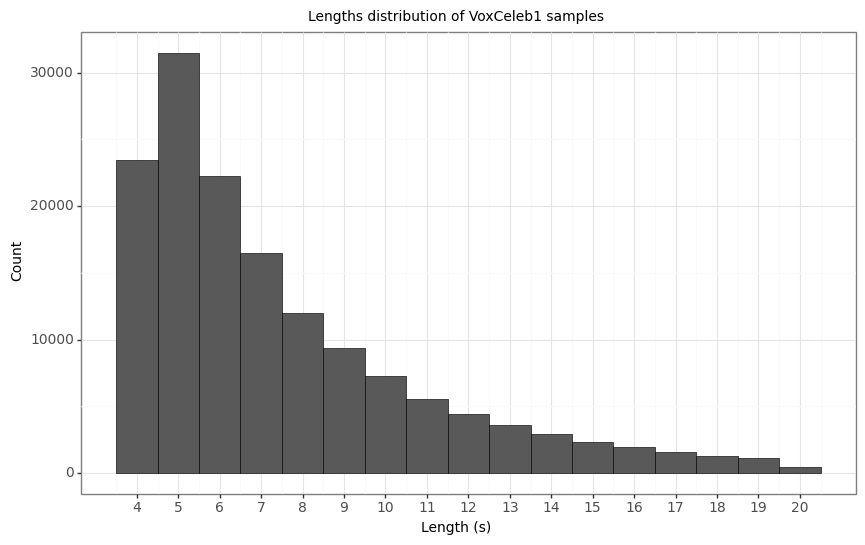

<ggplot: (8752951440354)>

In [6]:
lengths = []

for file in tqdm(files):
    audio, sr = sf.read(file, dtype='int16')
    lengths.append(len(audio))

df_length = pd.DataFrame({'Length': lengths})
df_length['Length'] = df_length['Length'] / 16000
df_length = df_length.drop(df_length[df_length['Length'] > 20].index)

plot = (
    ggplot()
    + xlab('Length (s)')
    + ylab('Count')
    + ggtitle(f'Lengths distribution of {DATASET_NAME} samples')
    + theme_bw()
    + theme(figure_size=(10, 6), text=element_text(size=10))
    + geom_histogram(
        df_length,
        aes(x='Length'),
        binwidth=1,
        color='black',
        position='identity',
        size=0.25
    )
    + scale_x_continuous(breaks=list(range(4, 21, 1)))
)

plot

In [7]:
100 * len(df_length[df_length['Length'] <= 4]) / len(df_length)

1.2694537686908758

In [8]:
100 * len(df_length[df_length['Length'] > 10]) / len(df_length)

19.47919845387041

## Voice Activity Detection

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████| 153516/153516 [15:45<00:00, 162.42it/s]


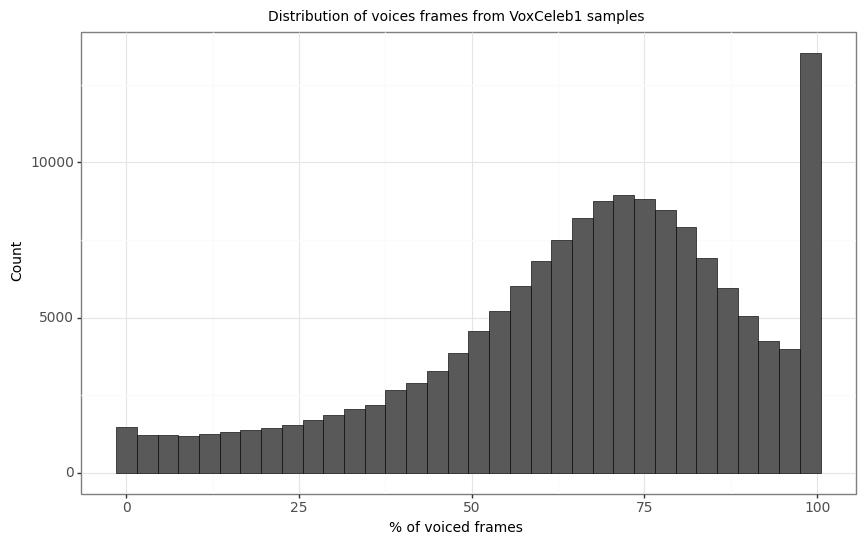

<ggplot: (8762178229056)>

In [8]:
from sslsv.preprocessing.VAD import VAD

vad = VAD(threshold=-20)

vads = []
for file in tqdm(files):
    audio, sr = sf.read(file, dtype='int16')
    _ = vad.apply(audio)
    vads.append(vad.last_vad.mean())

df_vad = pd.DataFrame({'VAD': vads})
df_vad['VAD'] = df_vad['VAD'] * 100

plot = (
    ggplot()
    + xlab('% of voiced frames')
    + ylab('Count')
    + ggtitle(f'Distribution of voices frames from {DATASET_NAME} samples')
    + theme_bw()
    + theme(figure_size=(10, 6), text=element_text(size=10))
    + geom_histogram(
        df_vad,
        aes(x='VAD'),
        binwidth=3,
        color='black',
        position='identity',
        size=0.25
    )
)

plot

In [9]:
100 * len(df_vad[df_vad['VAD'] >= 75]) / len(df_vad)

39.47080434612679

In [10]:
100 * len(df_vad[df_vad['VAD'] >= 50]) / len(df_vad)

78.35535058234973

In [11]:
100 * len(df_vad[df_vad['VAD'] <= 25]) / len(df_vad)

7.728836082232471